<a href="https://www.kaggle.com/code/lallasankara/hack4la-los-angeles-crime-data?scriptVersionId=147537723" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/los-angeles-crime-arrest-data/UCR-COMPSTAT062618.pdf
/kaggle/input/los-angeles-crime-arrest-data/socrata_metadata_arrest-data-from-2010-to-present.json
/kaggle/input/los-angeles-crime-arrest-data/crime-data-from-2010-to-present.csv
/kaggle/input/los-angeles-crime-arrest-data/socrata_metadata_crime-data-from-2010-to-present.json
/kaggle/input/los-angeles-crime-arrest-data/MO_CODES_Numerical_20180627.pdf
/kaggle/input/los-angeles-crime-arrest-data/ucr_handbook_2013.pdf
/kaggle/input/los-angeles-crime-arrest-data/arrest-data-from-2010-to-present.csv


In [2]:
df_crime = pd.read_csv("/kaggle/input/los-angeles-crime-arrest-data/crime-data-from-2010-to-present.csv")

In [3]:
df_crime.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,102005556,2010-01-25T00:00:00,2010-01-22T00:00:00,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"{'latitude': '34.0454', 'needs_recoding': Fals..."
1,101822289,2010-11-11T00:00:00,2010-11-10T00:00:00,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"{'latitude': '33.9572', 'needs_recoding': Fals..."
2,101105609,2010-01-28T00:00:00,2010-01-27T00:00:00,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"{'latitude': '34.1211', 'needs_recoding': Fals..."
3,101620051,2010-11-11T00:00:00,2010-11-07T00:00:00,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"{'latitude': '34.241', 'needs_recoding': False..."
4,101910498,2010-04-07T00:00:00,2010-04-07T00:00:00,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"{'latitude': '34.3147', 'needs_recoding': Fals..."


In [4]:
df_crime.shape

(1993259, 26)

In [5]:
df_crime.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [6]:
df_crime.columns = [c.replace(' ', '_') for c in df_crime.columns]

In [7]:
df_crime['Area_Name'].describe()

count         1993259
unique             21
top       77th Street
freq           137513
Name: Area_Name, dtype: object

In [8]:
df_crime['Crime_Code'].describe()

count    1.993259e+06
mean     5.069209e+02
std      2.104709e+02
min      1.100000e+02
25%      3.300000e+02
50%      4.410000e+02
75%      6.260000e+02
max      9.560000e+02
Name: Crime_Code, dtype: float64

In [9]:
df_crime['Crime_Code_Description'].head()

0    VEHICLE - STOLEN
1    VEHICLE - STOLEN
2    VEHICLE - STOLEN
3    VEHICLE - STOLEN
4    VEHICLE - STOLEN
Name: Crime_Code_Description, dtype: object

In [10]:
df_crime.describe()

,DR_Number,Time_Occurred,Area_ID,Reporting_District,Crime_Code,Victim_Age,Premise_Code,Weapon_Used_Code,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4
count,1.993259e+06,1.993259e+06,1.993259e+06,1.993259e+06,1.993259e+06,1.993259e+06,1.993209e+06,667618.000000,1.993250e+06,130161.000000,3235.000000,96.000000
mean,1.452681e+08,1.361522e+03,1.110423e+01,1.156819e+03,5.069209e+02,3.178082e+01,3.111638e+02,371.145126,5.067552e+02,950.934166,971.498300,974.218750
std,2.759142e+07,6.467373e+02,6.007329e+00,6.007339e+02,2.104709e+02,2.060810e+01,2.110329e+02,113.643154,2.103421e+02,125.442245,87.084159,84.043623
min,2.100000e+02,1.000000e+00,1.000000e+00,1.000000e+02,1.100000e+02,-9.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,93.000000,421.000000
25%,1.212041e+08,9.300000e+02,6.000000e+00,6.440000e+02,3.300000e+02,2.000000e+01,1.020000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000
50%,1.502066e+08,1.430000e+03,1.200000e+01,1.203000e+03,4.410000e+02,3.200000e+01,2.100000e+02,400.000000,4.410000e+02,998.000000,998.000000,998.000000
75%,1.707102e+08,1.900000e+03,1.600000e+01,1.672000e+03,6.260000e+02,4.600000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000
max,9.102204e+08,2.359000e+03,2.100000e+01,2.199000e+03,9.560000e+02,1.180000e+02,9.710000e+02,516.000000,9.990000e+02,999.000000,999.000000,999.000000


In [11]:
df_crime.Victim_Age.mean()

31.780824268195953

In [12]:
df_crime.DR_Number.count()

1993259

In [13]:
df_crime.Area_Name.value_counts()

Area_Name
77th Street    137513
Southwest      128111
N Hollywood    107707
Pacific        105655
Southeast      105104
Mission         98395
Northeast       94912
Van Nuys        94358
Newton          94123
Hollywood       92742
Topanga         92262
Devonshire      91347
Central         90489
Olympic         89634
Harbor          86972
West Valley     84521
Rampart         84241
West LA         83736
Wilshire        82575
Foothill        75348
Hollenbeck      73514
Name: count, dtype: int64

In [14]:
df_crime.Address.value_counts()

Address
6TH                          ST            4524
7TH                          ST            3567
9300    TAMPA                        AV    3396
6TH                                        3025
5TH                          ST            2874
                                           ... 
FLEET                        AV               1
PURDUE                       ST               1
100    SPINNAKER MA                           1
6500    SUNSET                       AV       1
CORINGA                                       1
Name: count, Length: 74330, dtype: int64

In [15]:
df_crime.Crime_Code_Description.value_counts()

Crime_Code_Description
BATTERY - SIMPLE ASSAULT                                   180434
BURGLARY FROM VEHICLE                                      153451
VEHICLE - STOLEN                                           151622
THEFT PLAIN - PETTY ($950 & UNDER)                         141489
BURGLARY                                                   140926
                                                            ...  
BLOCKING DOOR INDUCTION CENTER                                  3
TRAIN WRECKING                                                  2
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        2
DRUNK ROLL - ATTEMPT                                            1
FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)         1
Name: count, Length: 140, dtype: int64

In [16]:
df_crime.Area_Name.unique()

array(['Olympic', 'Southeast', 'Northeast', 'Foothill', 'Mission',
       'Newton', 'West Valley', '77th Street', 'Pacific', 'N Hollywood',
       'Topanga', 'Devonshire', 'Rampart', 'Central', 'Southwest',
       'Hollenbeck', 'Hollywood', 'Harbor', 'West LA', 'Wilshire',
       'Van Nuys'], dtype=object)

In [17]:
#Graphs for Crime Data 

/tmp/ipykernel_20/3006690556.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_crime['Victim_Age'])


<Axes: xlabel='Victim_Age', ylabel='Density'>

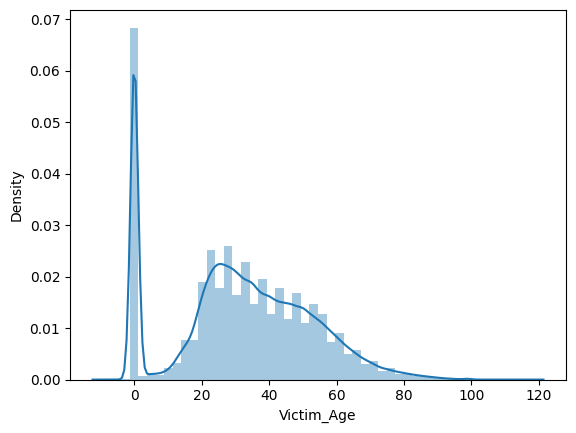

In [18]:
#Histogram 
sns.distplot(df_crime['Victim_Age'])

In [19]:
#Scatter Plot

In [20]:
#Skewness and Kurtosis

In [21]:
#Box Plot

In [22]:
# Correlation Matrix

In [23]:
# Correlation Matrix